In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Part 2 - Now let's make the ANN!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [13]:
# Initialising the ANN
model = Sequential()

In [14]:
# Adding the input layer and the first hidden layer
model.add(Dense(units=11,activation='relu'))

In [15]:
# Adding the input layer and the first hidden layer
model.add(Dense(units=6,activation='relu'))
model.add(Dropout(0.2))

In [16]:
# Adding the input layer and the first hidden layer
model.add(Dense(units=1,activation='relu'))
model.add(Dropout(0.3))

In [20]:
#To define own learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [21]:
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [23]:
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping)

Epoch 1/50


536/536 [==============================] - 3s 3ms/step - loss: 1.5717 - accuracy: 0.7932 - val_loss: 0.5722 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 1s 3ms/step - loss: 1.3163 - accuracy: 0.7974 - val_loss: 0.5529 - val_accuracy: 0.7959
Epoch 3/50
536/536 [==============================] - 1s 3ms/step - loss: 1.3856 - accuracy: 0.8016 - val_loss: 0.5224 - val_accuracy: 0.8039
Epoch 4/50
536/536 [==============================] - 1s 3ms/step - loss: 1.2282 - accuracy: 0.8084 - val_loss: 0.4417 - val_accuracy: 0.8084
Epoch 5/50
536/536 [==============================] - 1s 3ms/step - loss: 1.2982 - accuracy: 0.8160 - val_loss: 0.5052 - val_accuracy: 0.7963
Epoch 6/50
536/536 [==============================] - 1s 3ms/step - loss: 1.2723 - accuracy: 0.8156 - val_loss: 0.4501 - val_accuracy: 0.8103
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 1.1488 - accuracy: 0.8281 - val_loss: 0.4213 - val_accuracy: 0.8232
Epoc

In [24]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


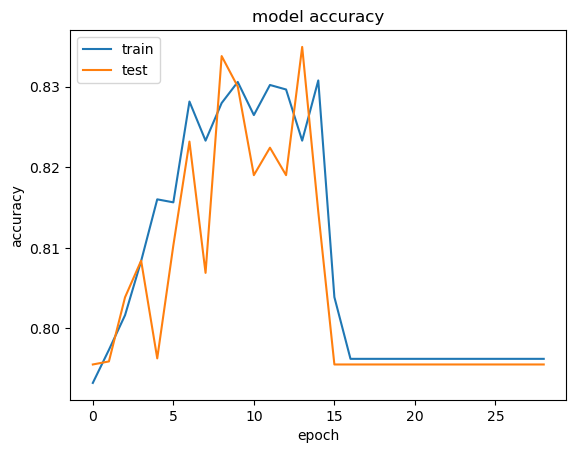

In [25]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

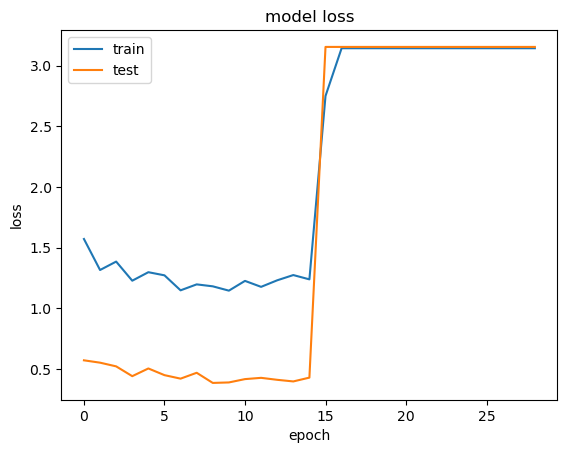

In [26]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [30]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [31]:
score

0.7975